In [20]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

print("Pytorch", torch.__version__)
print("Torchvision", torchvision.__version__)

Pytorch 1.5.1
Torchvision 0.6.1


In [4]:
use_pretrained = True
net = models.vgg16(pretrained= use_pretrained)
net.eval()
print(net)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Admin/.cache\torch\checkpoints\vgg16-397923af.pth
100.0%


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
class BaseTransform():
    def __init__(self, resize, mean ,std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    def __call__(self, img):
        return self.base_transform(img)

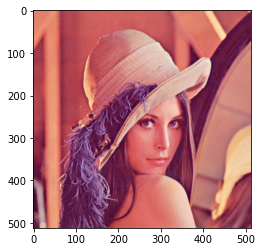

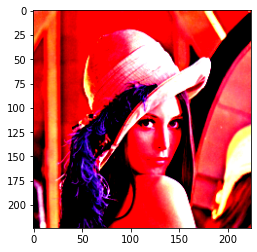

In [16]:
img_path ="./data/lena.png"
img = Image.open(img_path)
plt.imshow(img)
plt.show()

resize = 224
means = (0.485, 0.456, 0.406)
stds = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, means ,stds)
img_transformed = transform(img)

img_transformed = img_transformed.numpy().transpose(1,2,0)
img_transformed = np.clip(img_transformed, 0 ,1)

plt.imshow(img_transformed)
plt.show()

In [17]:
class Predictor():
    def __init__(self, class_index):
        self.class_index = class_index
       
    def predict_max(self, out):
        max_id = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(max_id)]
        
        return predicted_label_name

In [21]:
class_index = json.load(open('./imagenet_class_index.json', 'r'))
predictor = Predictor(class_index)

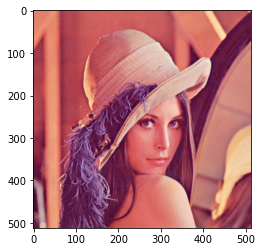

Result:  ['n03325584', 'feather_boa']


In [25]:
img_path ="./data/lena.png"
img = Image.open(img_path)
plt.imshow(img)
plt.show()

resize = 224
means = (0.485, 0.456, 0.406)
stds = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, means ,stds)
img_transformed = transform(img)
img_transformed = img_transformed.unsqueeze_(0)
# img_transformed.shape
out = net(img_transformed)
result = predictor.predict_max(out)
print("Result: ", result)